## 1.Introduction

    NSL-KDD (for network-based intrusion detection systems (IDS)) is a dataset suggested to solve some of the inherent problems of the parent KDD'99 dataset. This IDS basically helps to determine security of systems and alarming when intrusion is noticed or detected. Choosing NSL-KDD provides insightful analysis using various machine learning algorithms for intrusion detection. Myself expecting to explore intuitive insights of intrusion detection and work on various machine learning algorithms that is reasonable to understand future instance of attacks and its types.

### Importing necessary libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
import missingno as mn # for missing values visualization
from wordcloud import WordCloud as wc # for most highlighted words visualization
from wordcloud import STOPWORDS as sw # this will help ignoring english stop words in string value
from sklearn.preprocessing import StandardScaler # for stardardizing the data to the normal scale
from sklearn.model_selection import train_test_split # for splitting data into train and test
from sklearn.tree import DecisionTreeClassifier # Decision Tree model classifier
from sklearn.ensemble import RandomForestClassifier # RandomForest model classification
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report,confusion_matrix # classification report purposes
import warnings
warnings.filterwarnings("ignore")

### Loading KDDTrain+ data

#### Dataset Feature names

In [59]:
col_names = np.array(["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate", "class", 'difficulty level']) #

    Above feature names are captured from below journal reference:
    
    Wahba, Yasmen & Elsalamouny, Ehab & Eltaweel, Ghada. (2015). Improving the Performance of Multi-class Intrusion Detection Systems using Feature Reduction. International Journal of Computer Science Issues.
    
    
    Also, this journal has cleared stated that class-label attacks are fall into 4 categories of data. 
    
    1. Denial of service (Dos), where attempts are to suspend services of a network resource making it unavailable to its intended users by overloading the server with too many requests to be handled.
    
    2. Probe attacks, where the hacker scans the network with the aim of exploiting a known vulnerability
    
    3. Remote-to-Local (R2L) attacks, where an attacker tries to gain local access to unauthorized information through sending packets to the victim machine. 
    
    4. User-to-Root (U2R) attacks, where an attacker gains root access to the system using his normal user account to exploit vulnerabilities.
    
    We then categorize the data into these 4 groups in later operations.

In [60]:
train_df = pd.read_csv("D:/Users/MohsenArg/Documents/Moogale/PayanNameh/NSL-KDD-Data-Analysis-and-Modeling-main/dataset/KDDTrain+.txt", names = col_names)
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


## 2. Exploratory Data Analysis (EDA)

#### Basic information about train_df along with its datatype

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

#### Checking missing data in train_df DataFrame

In [62]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot: >

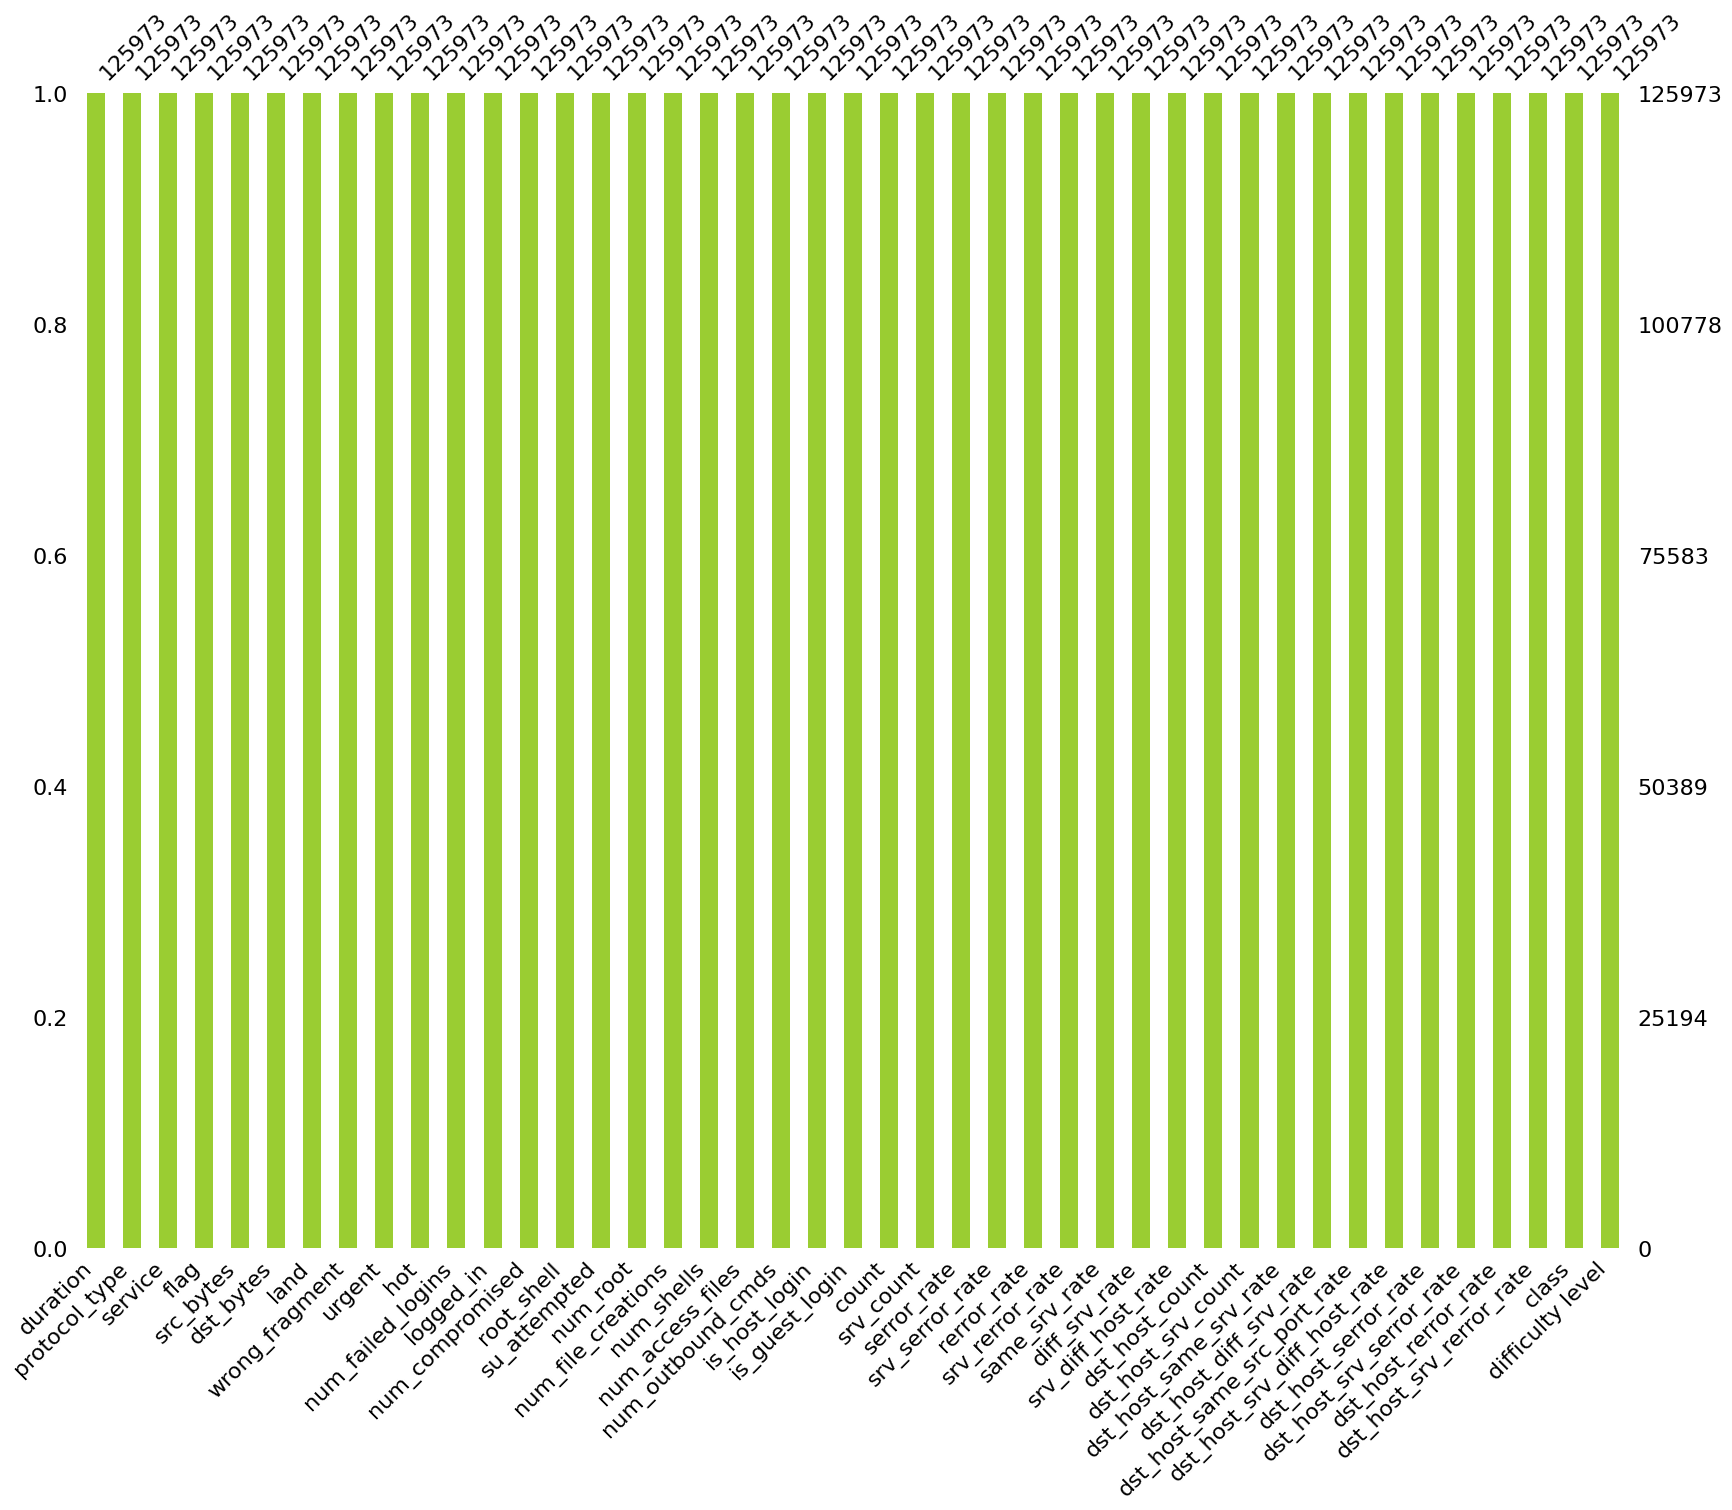

In [63]:
mn.bar(train_df, color = 'yellowgreen', figsize = (20,15)) # no missing data found in training dataset

    No missing values in found in train dataset

In [64]:
test_df = pd.read_csv("D:/Users/MohsenArg/Documents/Moogale/PayanNameh/NSL-KDD-Data-Analysis-and-Modeling-main/dataset/KDDTest+.txt", names = col_names)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [65]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

#### Missing data information in test_df DataFrame

In [66]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

<AxesSubplot:>

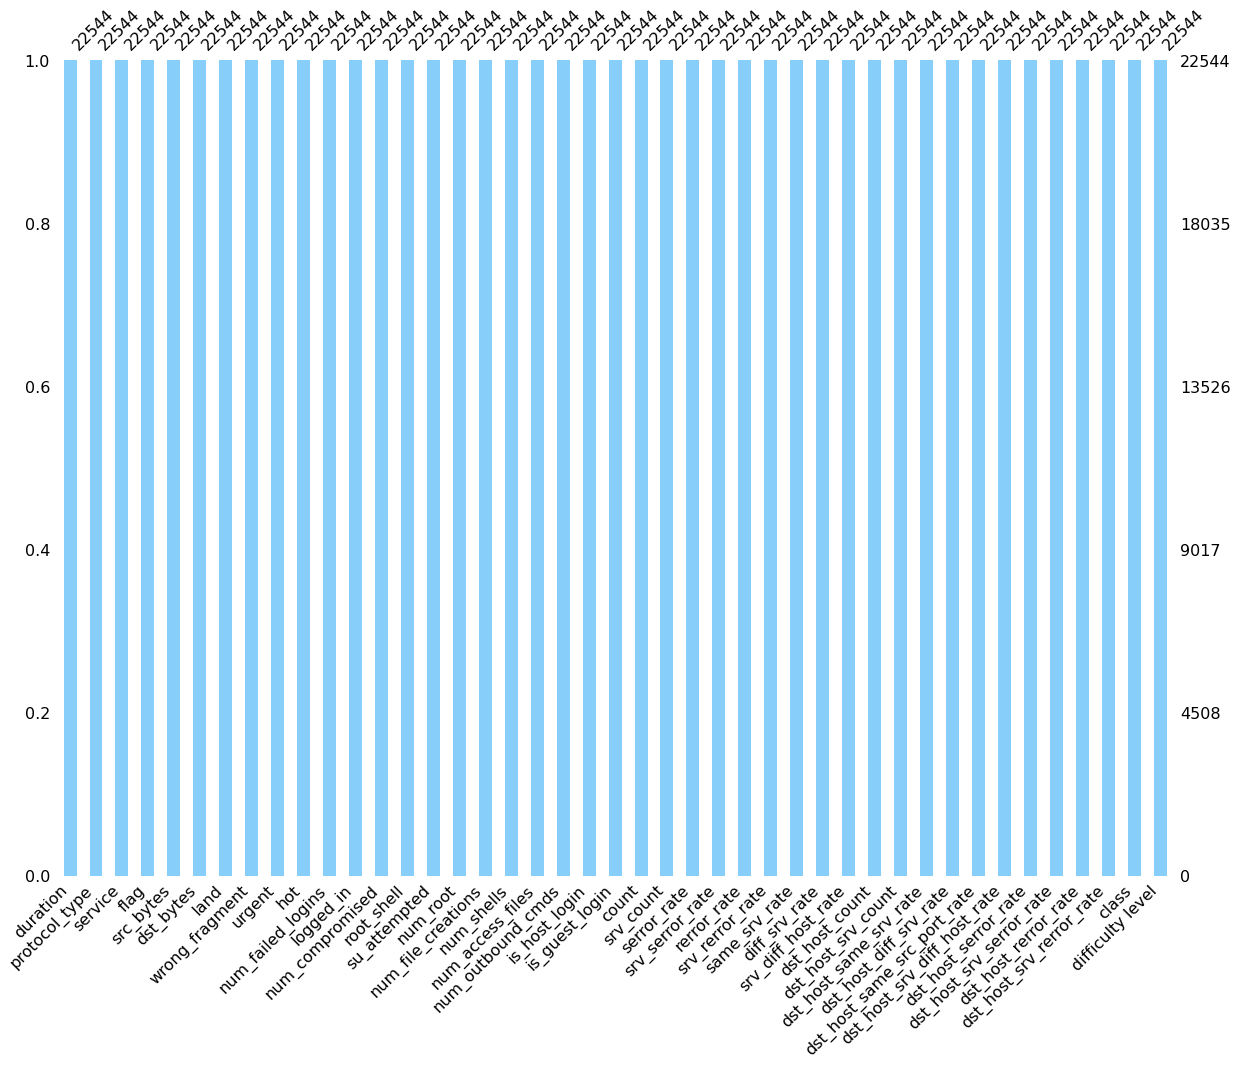

In [10]:
mn.bar(test_df, color = 'lightskyblue', figsize = (20,15)) # no missing data found in test data also

    no missing values found in test dataset.

In [67]:
train_df['class'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [68]:
train_df['difficulty level'].unique()

array([20, 15, 19, 21, 18, 17, 16, 12, 14, 11,  2, 13, 10,  9,  8,  7,  3,
        5,  1,  6,  0,  4], dtype=int64)

#### class label data sizes in dataset

In [69]:
classLabel_counts = train_df.groupby(['class']).size()
classLabel_counts

class
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
dtype: int64

#### Feature "class" labels percentage with respect to size of train_df (i.e. 125973)

In [70]:
per_classLabels = classLabel_counts/train_df.shape[0]*100
per_classLabels

class
back                0.758893
buffer_overflow     0.023815
ftp_write           0.006351
guess_passwd        0.042073
imap                0.008732
ipsweep             2.856961
land                0.014289
loadmodule          0.007144
multihop            0.005557
neptune            32.716534
nmap                1.185175
normal             53.458281
perl                0.002381
phf                 0.003175
pod                 0.159558
portsweep           2.326689
rootkit             0.007938
satan               2.883951
smurf               2.100450
spy                 0.001588
teardrop            0.708088
warezclient         0.706501
warezmaster         0.015876
dtype: float64

    class label "neptune" holds 32.7% of data and "normal" label holds 53.4% from whole data. Rest of all labels (13.9%) are distributed quite less from whole data.

#### Class label percentages represented in graph

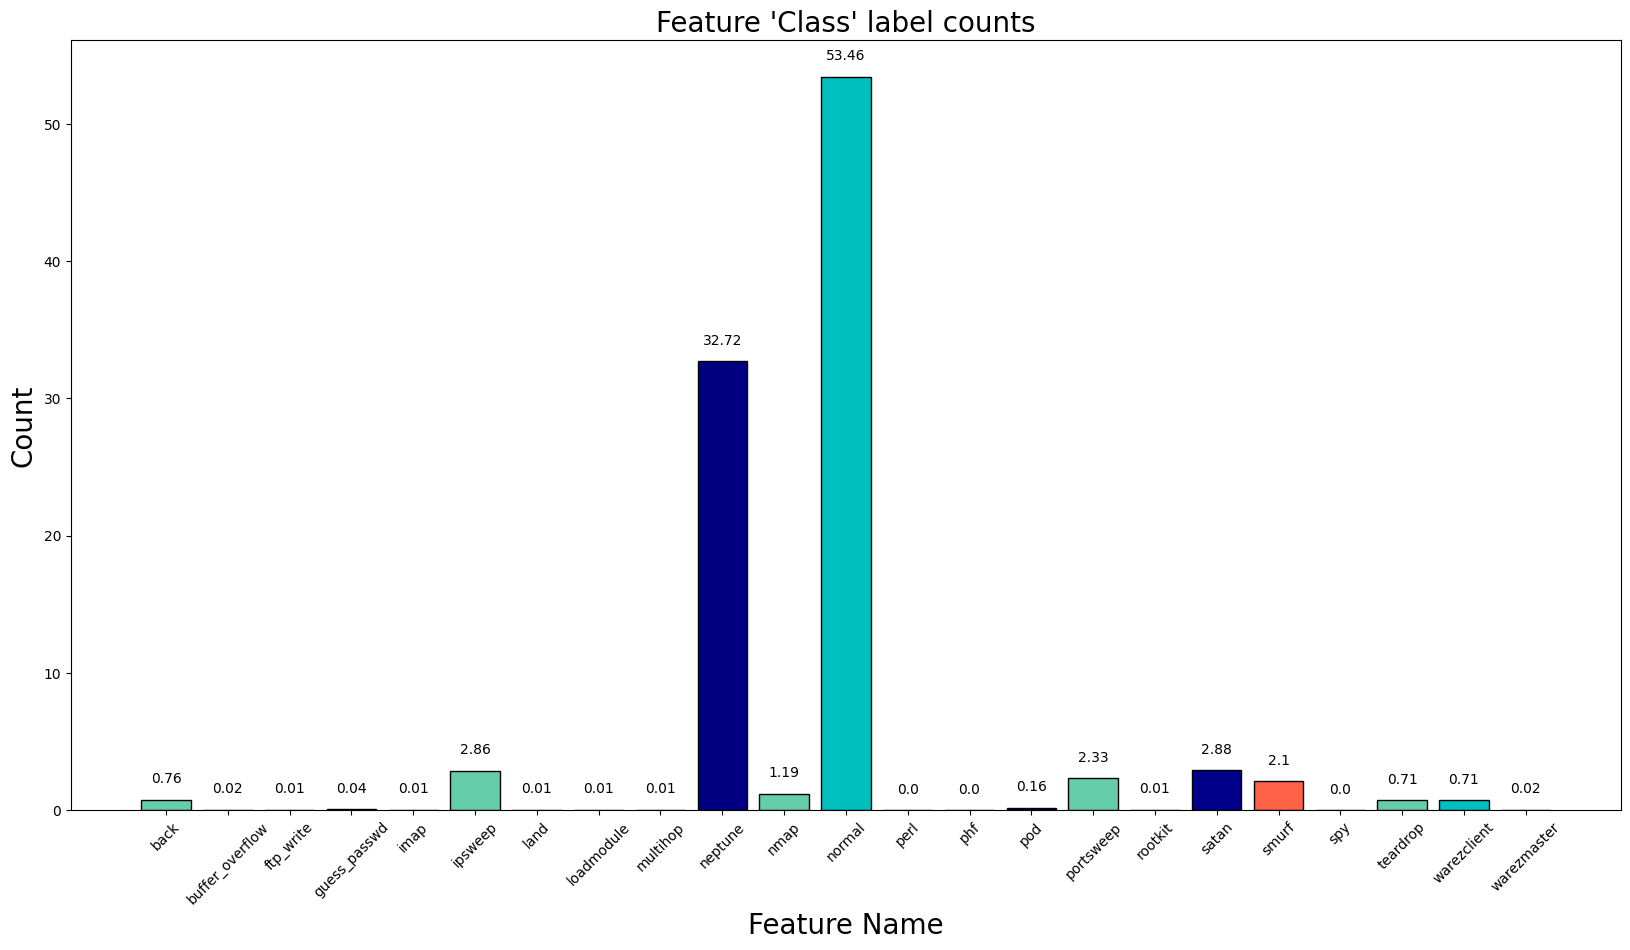

In [16]:
fig = plt.figure(figsize = (20,10))
r_ = [round(each, 2) for each in per_classLabels.values]
ax = fig.add_subplot(111)
ax.bar(per_classLabels.index, per_classLabels.values, color = ["mediumaquamarine", 'c', 'darkblue', 'tomato', 'navy'], edgecolor = 'black')
ax.set_xticklabels(per_classLabels.index, rotation = 45)
ax.set_xlabel("Feature Name", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Feature 'Class' label counts", fontsize = 20)

for i in range(len(per_classLabels.values)):
    plt.annotate(str(r_[i]), xy=(per_classLabels.index[i],r_[i]+1), ha='center', va='bottom')

#### Pie chart: Amount of different class labels

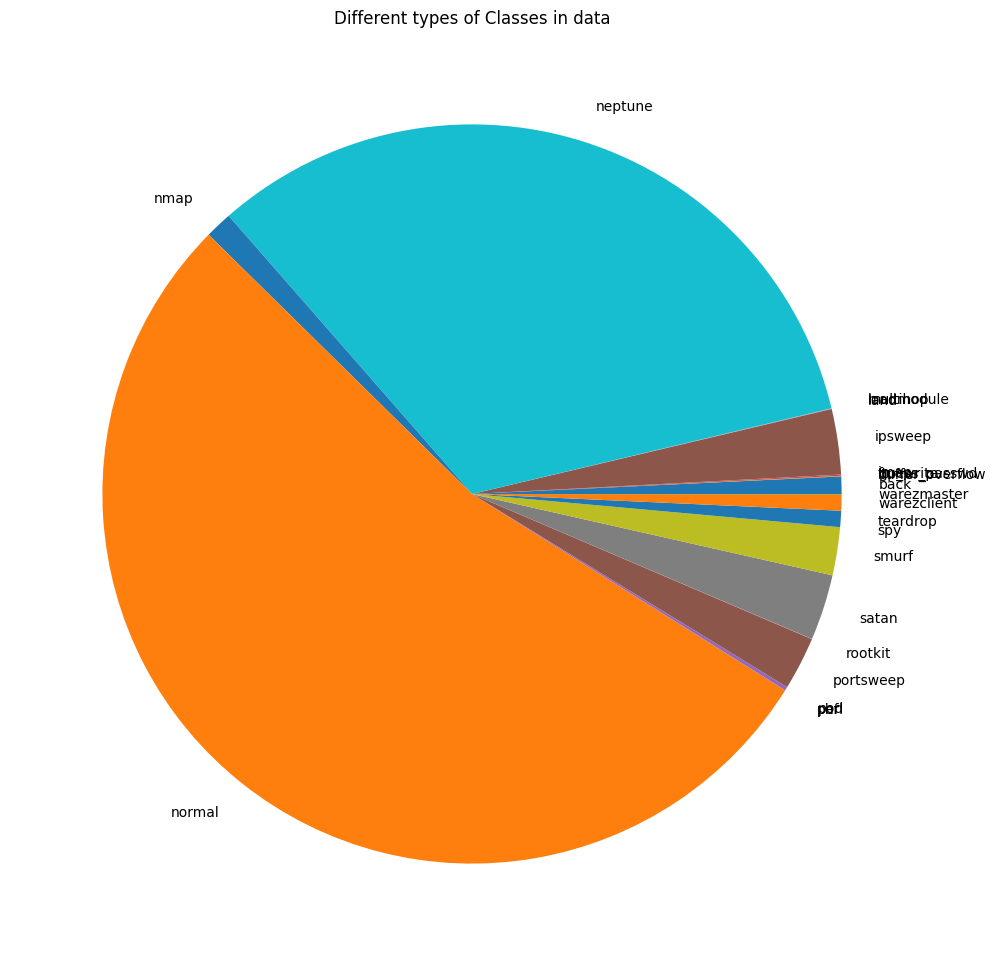

In [71]:
group_data = train_df.groupby('class').size()
plt.figure(figsize = (15,12))
group_data.plot(kind='pie')
plt.title("Different types of Classes in data")
plt.ylabel("")
plt.show()

#### Pie Chart: Difficulty levels percentages

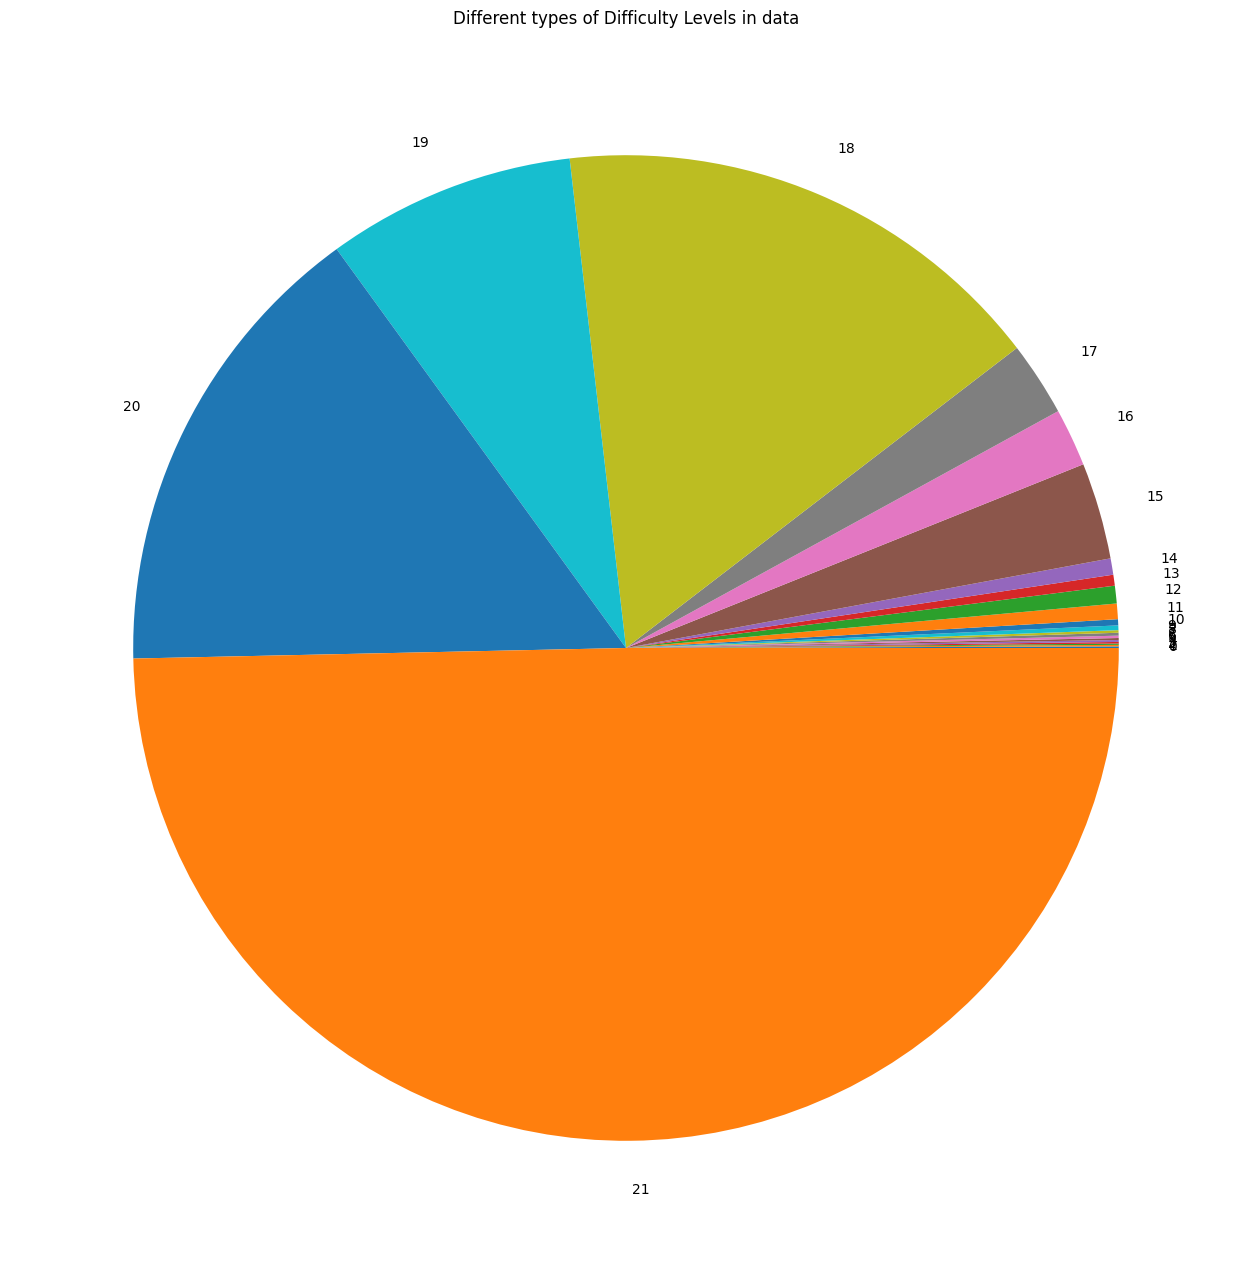

In [18]:
group_data = train_df.groupby('difficulty level').size()
plt.figure(figsize = (16,16))
group_data.plot(kind='pie')
plt.title("Different types of Difficulty Levels in data")
plt.ylabel("")
plt.show()

## 3. Preprocessing, EDA and Transformation of data

### Categorizing class labels data into 4 different groups: Dos (Denial of service), Probe (probe attacks), R2L (Remote to Local) and U2R (User to Root)

In [72]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


#### Function helps to classify different class labels into attack_types

In [73]:
Dos = ['land','neptune','smurf','pod','back','teardrop']
Probe = ['portsweep','ipsweep','satan','nmap']
U2R = ['buffer_overflow','loadmodule','perl','rootkit']

def encode_attack(vec):
    if vec in Dos:
        return "Dos"
    elif vec in Probe:
        return "Probe";
    elif vec in U2R:
        return "U2R"
    elif vec == "normal":
        return "normal"
    else:
        return "R2L"

#### Creating new variable called "attack_type" where it classified different "class" labels to Dos, Probe, U2R, R2L and Normal

In [74]:
train_df['attack_type'] = train_df['class'].apply(encode_attack)
train_df.iloc[:10, -5:]

,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.05,0.00,normal,20,normal
1,0.00,0.00,normal,15,normal
2,0.00,0.00,neptune,19,Dos
3,0.00,0.01,normal,21,normal
4,0.00,0.00,normal,21,normal
5,1.00,1.00,neptune,21,Dos
6,0.00,0.00,neptune,21,Dos
7,0.00,0.00,neptune,21,Dos
8,0.00,0.00,neptune,21,Dos
9,0.00,0.00,neptune,21,Dos


#### Different attack types data sizes

In [75]:
train_df.groupby('attack_type').size()

attack_type
Dos       45927
Probe     11656
R2L         995
U2R          52
normal    67343
dtype: int64

#### Percentage of data hold by different attack types

In [76]:
percent_data = (train_df.groupby('attack_type').size())/train_df.shape[0] * 100
percent_data

attack_type
Dos       36.457812
Probe      9.252776
R2L        0.789852
U2R        0.041279
normal    53.458281
dtype: float64

#### Amount of different attack types hold the data

    graph represents that "Normal" data holds 53.4%, "Dos" hold 36.46%, "Probe" attack type hold 9.2% of data and rest "R2L" and "U2R" are less than 1% data holds.

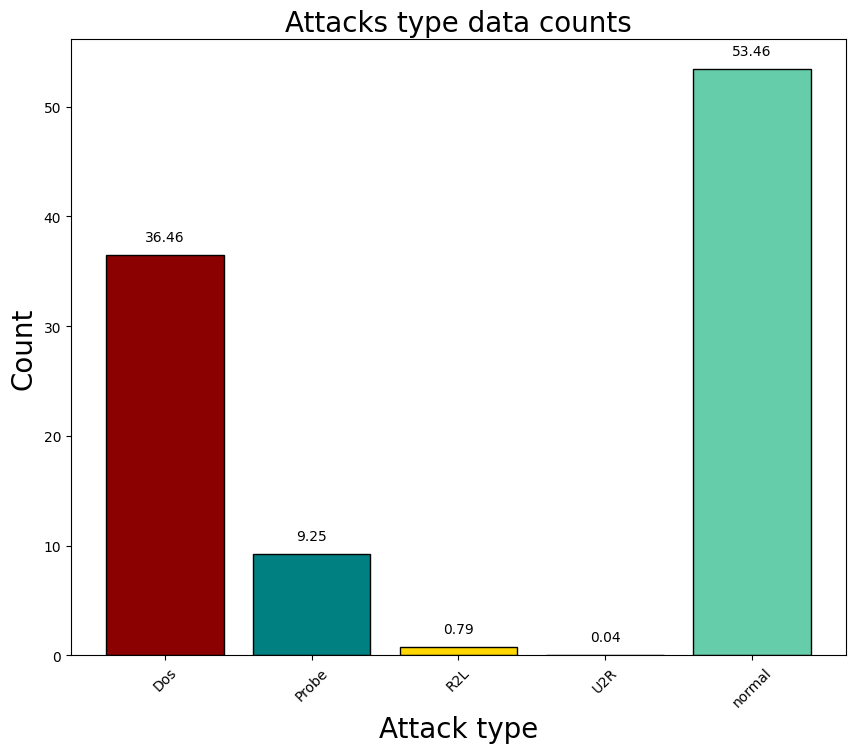

In [21]:
fig = plt.figure(figsize = (10,8))
r_ = [round(each, 2) for each in percent_data.values]
ax = fig.add_subplot(111)
ax.bar(percent_data.index, percent_data.values, color = ['darkred', 'teal', 'gold', 'lightseagreen', "mediumaquamarine"], edgecolor = 'black')
ax.set_xticklabels(percent_data.index, rotation = 45)
ax.set_xlabel("Attack type", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
ax.set_title("Attacks type data counts", fontsize = 20)

for i in range(len(percent_data.values)):
    plt.annotate(str(r_[i]), xy=(percent_data.index[i],r_[i]+1), ha='center', va='bottom')

#### Pie chart: Different types of attack types in data
    In the dataset, "Normal" data holds 53.4%, "Dos" hold 36.46%, "Probe" attack type hold 9.2% of data and rest "R2L" and "U2R" are less than 1% data holds.

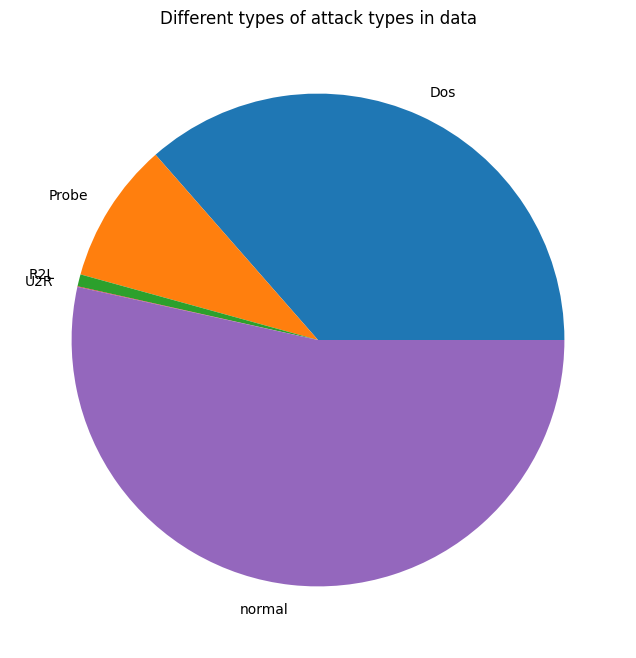

In [25]:
group_data = train_df.groupby('attack_type').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Different types of attack types in data")
plt.ylabel("")
plt.show()

#### Different Protocol types

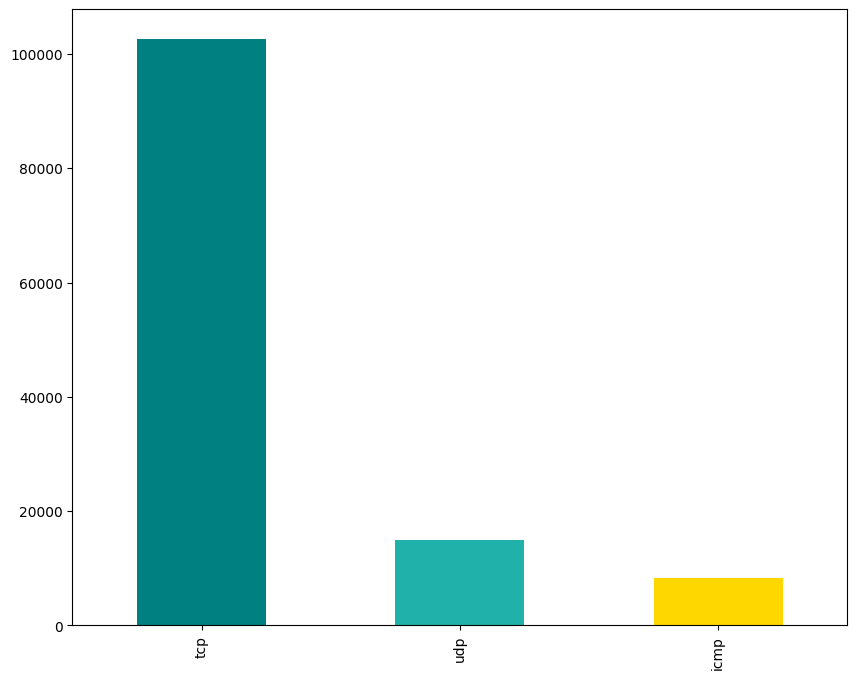

In [26]:
plt.subplots(figsize=(10,8))
train_df['protocol_type'].value_counts(normalize = True)
train_df['protocol_type'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

    "tcp" protocol is much hold the data compared to "udp" and "icmp"

#### Different types of Services in Data

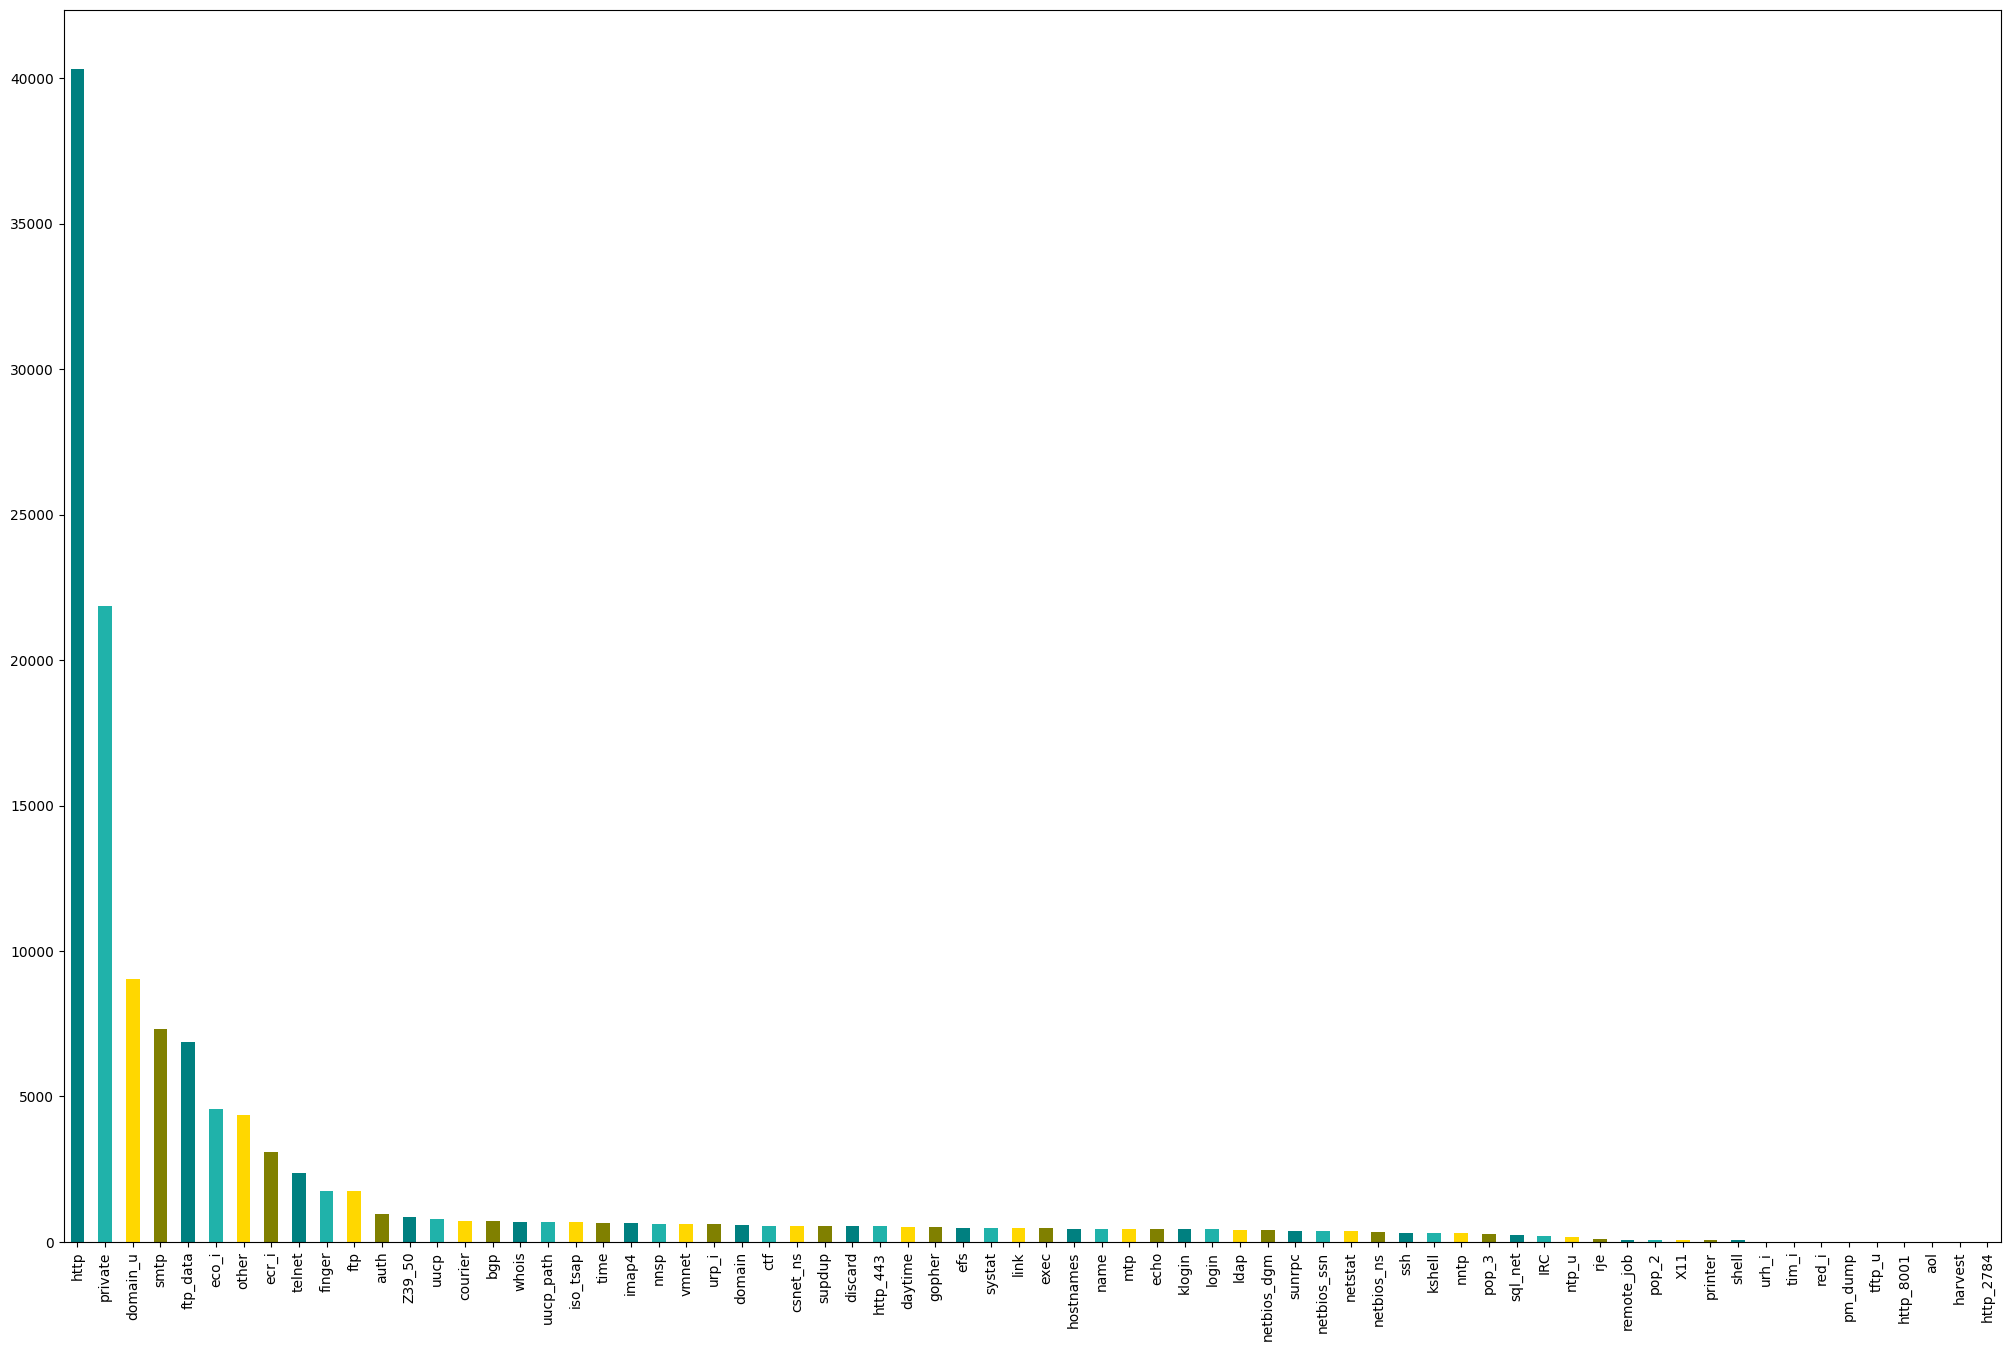

In [25]:
plt.subplots(figsize=(25,16))
train_df['service'].value_counts(normalize = True)
train_df['service'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

    In the dataset, "http" requests are high in nature when compared to "private" which is approximately half of "http" requests. Rest of all requests are hold 0 to 10% of whole data. 

#### Different types of Flags in data

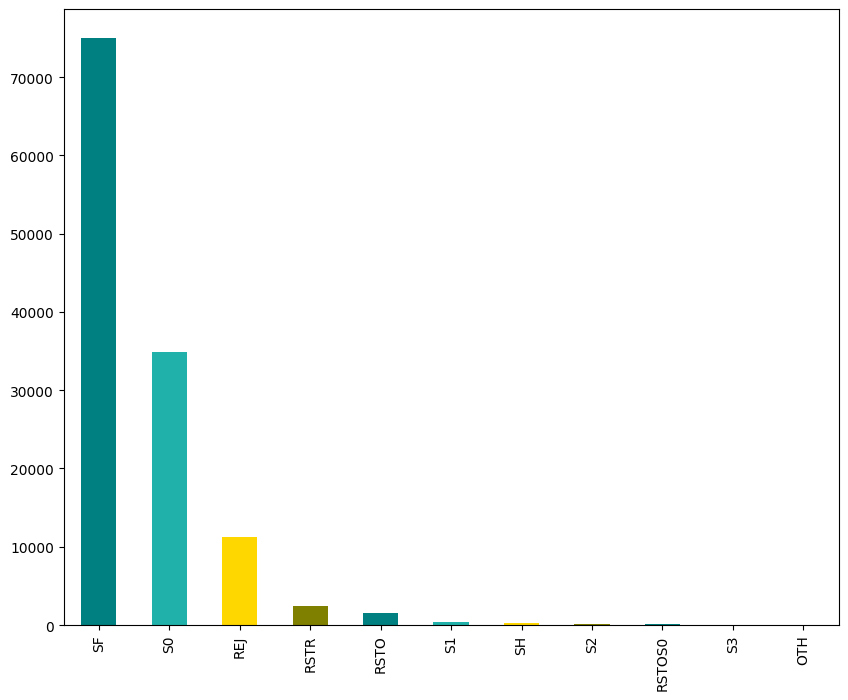

In [28]:
plt.subplots(figsize=(10,8))
train_df['flag'].value_counts(normalize = True)
train_df['flag'].value_counts(dropna = False).plot.bar(color=['teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

    More of "SF", "S0" and "REJ" flags observed in dataset

#### Most highlighted flags in dataset

(-0.5, 399.5, 199.5, -0.5)

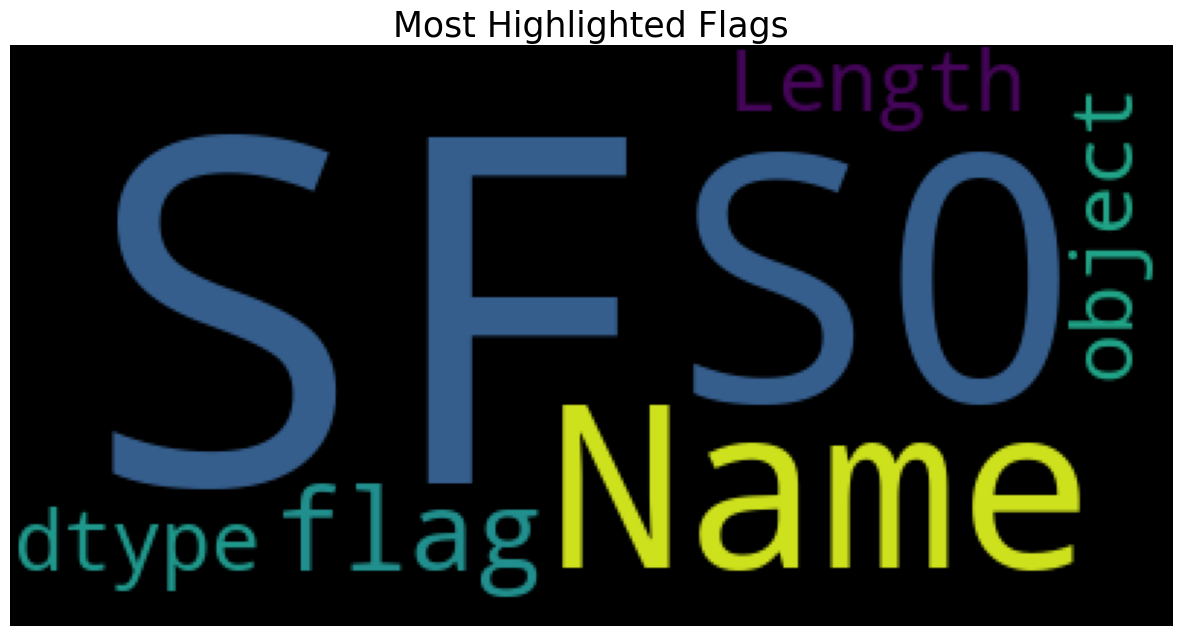

In [29]:
stop_words = set(sw)

word_cloud = wc(stopwords = stop_words).generate(str(train_df['flag']))

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['lines.color'] = 'gold'
print(word_cloud)
plt.imshow(word_cloud)
plt.title('Most Highlighted Flags', fontsize = 25)
plt.axis("off")

    More of "S0" and "SF" flags observed in data

### Correlation between all numerical variables in dataset
    Using Heatmap visualization technique, correlation (associations) coefficients between numerical variables are shown in below heatmap plot.

<AxesSubplot: >

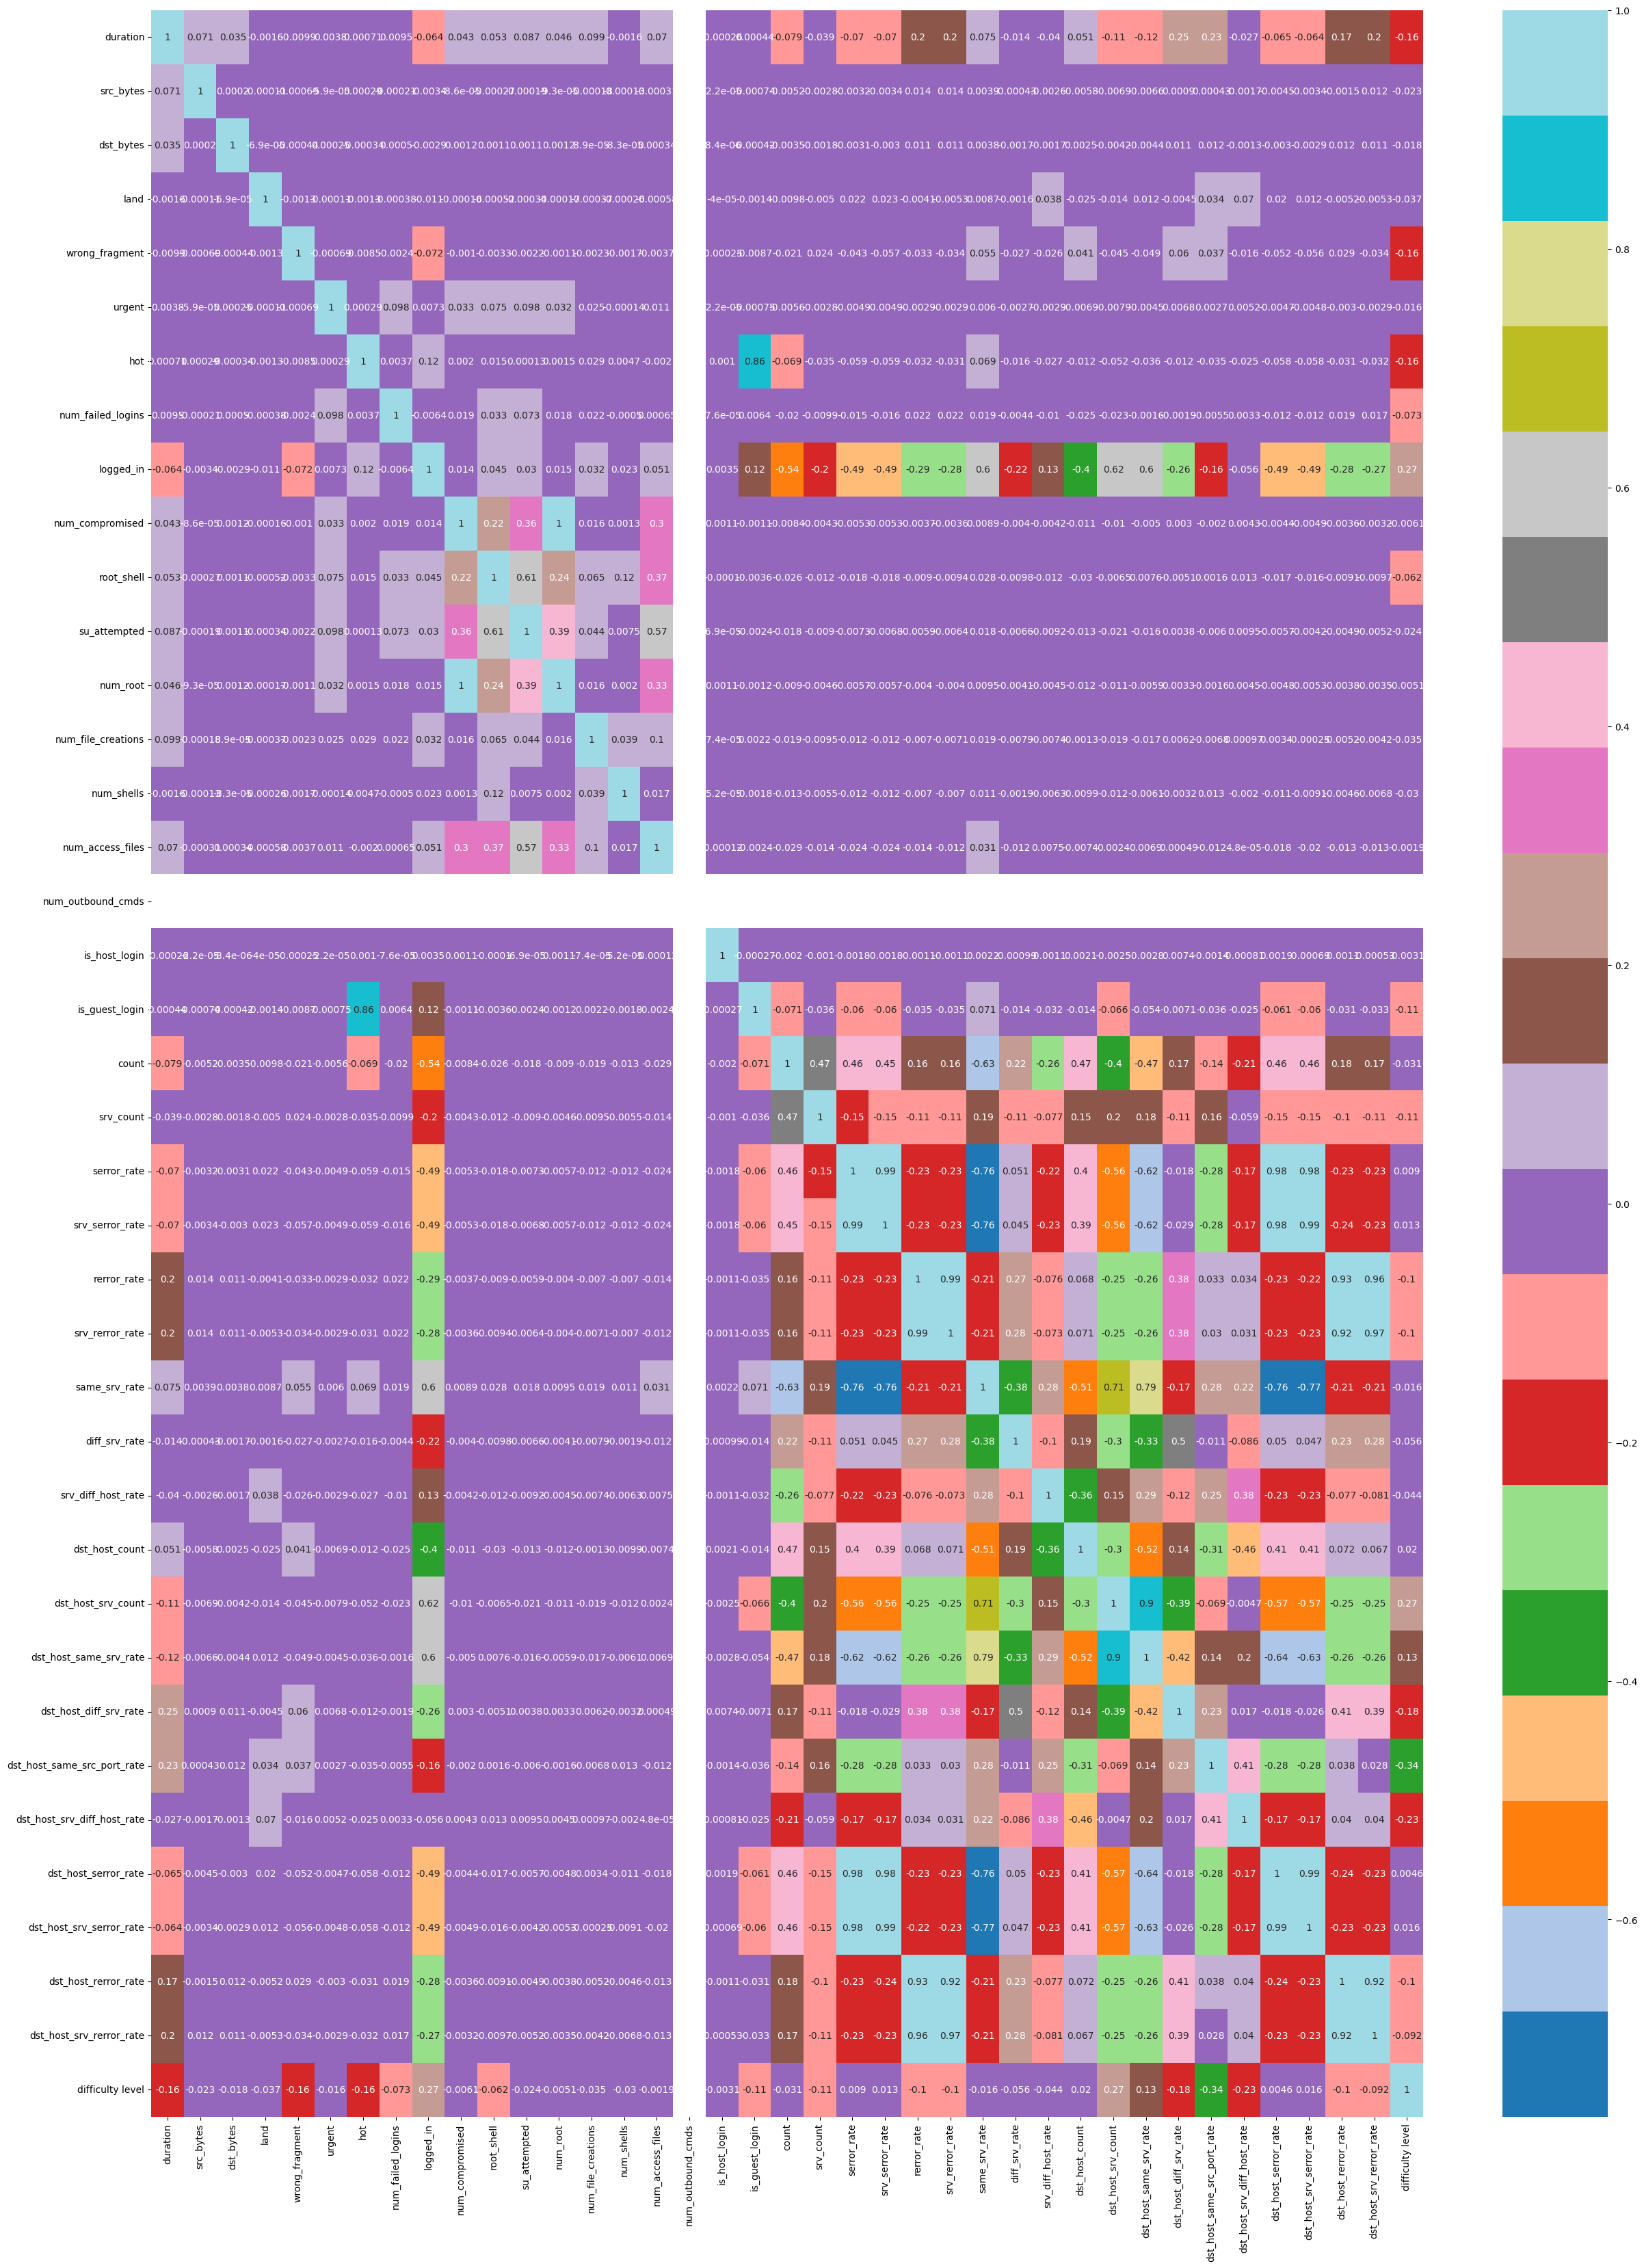

In [26]:
plt.figure(figsize=(30, 40))
sns.heatmap(train_df.corr(), annot=True, cmap="tab20", annot_kws={"size":10})

In [77]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,Dos
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20,Dos


In [78]:
numerical_cols = [one for each,one in zip(list(train_df.dtypes),train_df.dtypes.index)  if each == 'int64' or each == 'float64']
numerical_cols

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'difficulty level']

#### Different flags dependencies on Attack types; Crosstab visualization

<Figure size 1000x800 with 0 Axes>

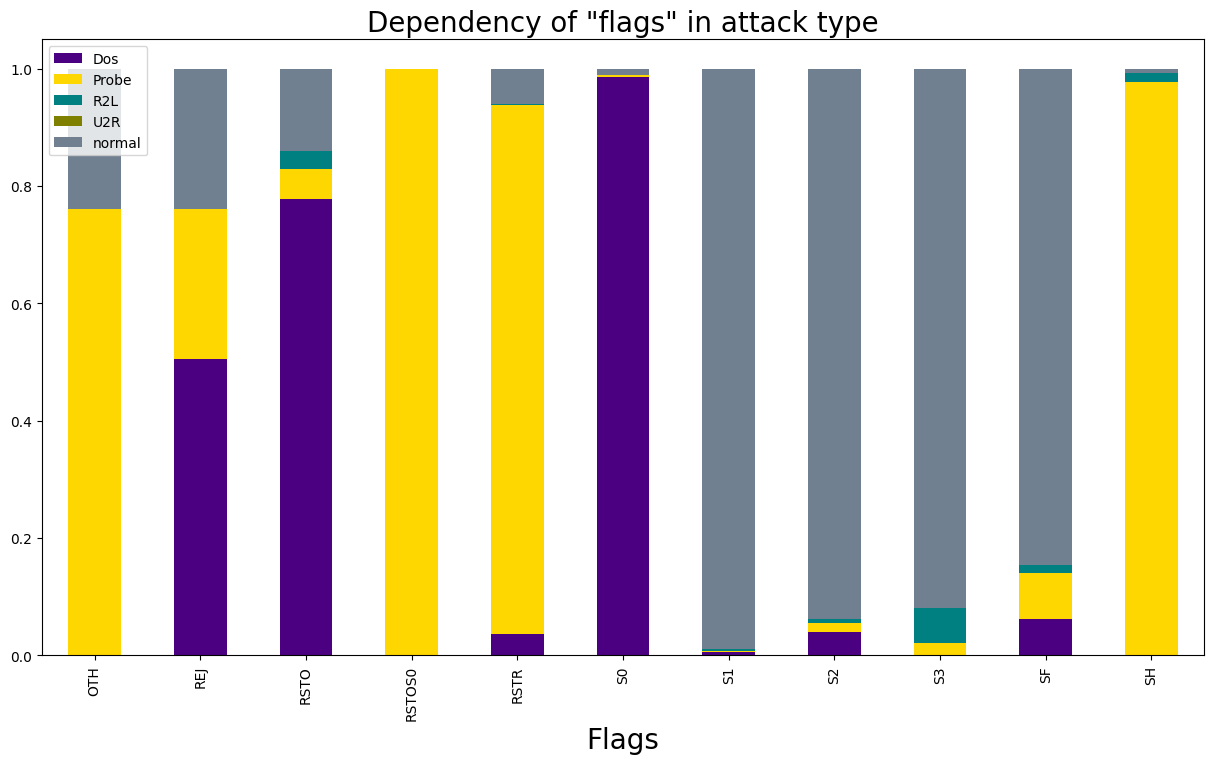

In [33]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['flag'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "flags" in attack type', fontsize = 20)
plt.xlabel('Flags', fontsize = 20)
plt.legend()
plt.show()

    There are different types of flags noted in "flag" variable. The above represented graph indicates that "OTH", "RSTOS0", "RSTR" and "SH" flags are highly dependency on Probe, "REJ", "RSTO" and "S0" flags are on Dos and S1, S2, S3 & SF on Normal. Rest R2L, U2R are slightly influenced by all of the flags.

#### Different protocols dependencies on attack types

<Figure size 1000x800 with 0 Axes>

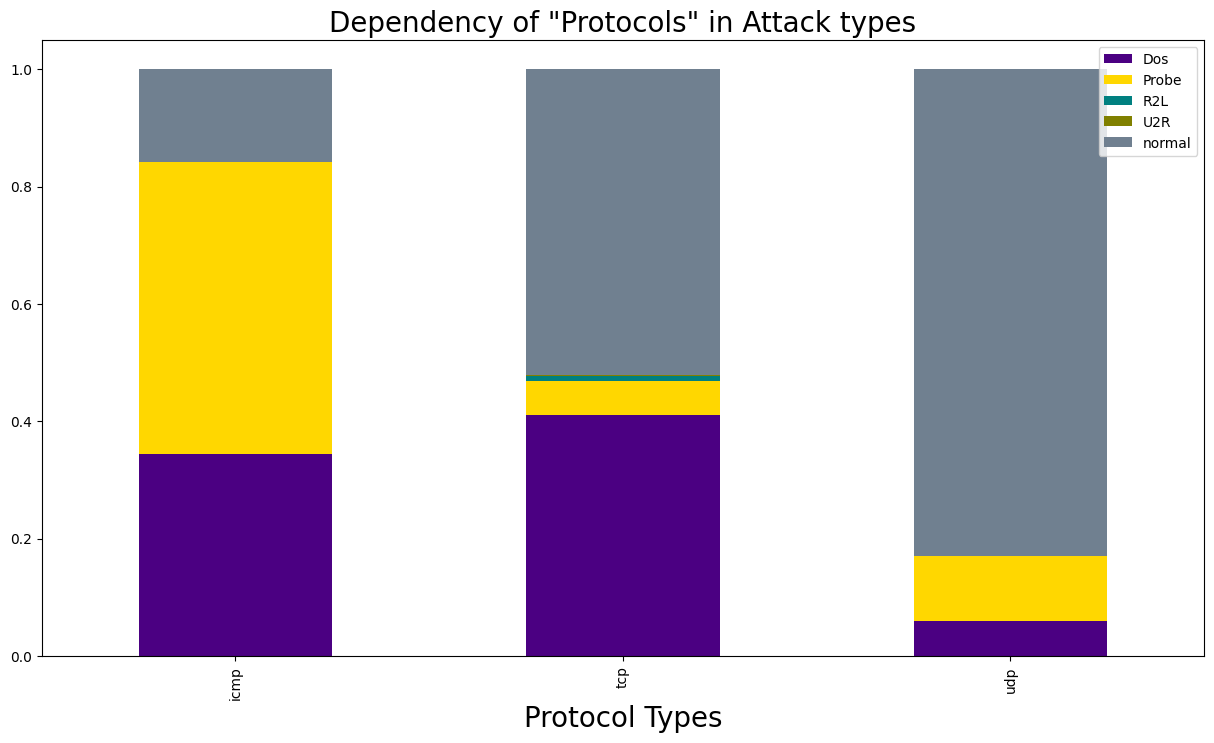

In [34]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['protocol_type'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', 'slategrey'])

plt.title('Dependency of "Protocols" in Attack types', fontsize = 20)
plt.xlabel('Protocol Types', fontsize = 20)
plt.legend()
plt.show()

    There are different types of Protocols noted in "protocol_type" variable. The above represented graph indicates that "icmp" protocol is much influencing Probe and slightly on Dos attack types. Where as, "tcp" is much influencing or dependency on Dos attack type. "udp" is high on Normal base.

#### Different services type dependencies on attack type

<Figure size 1000x800 with 0 Axes>

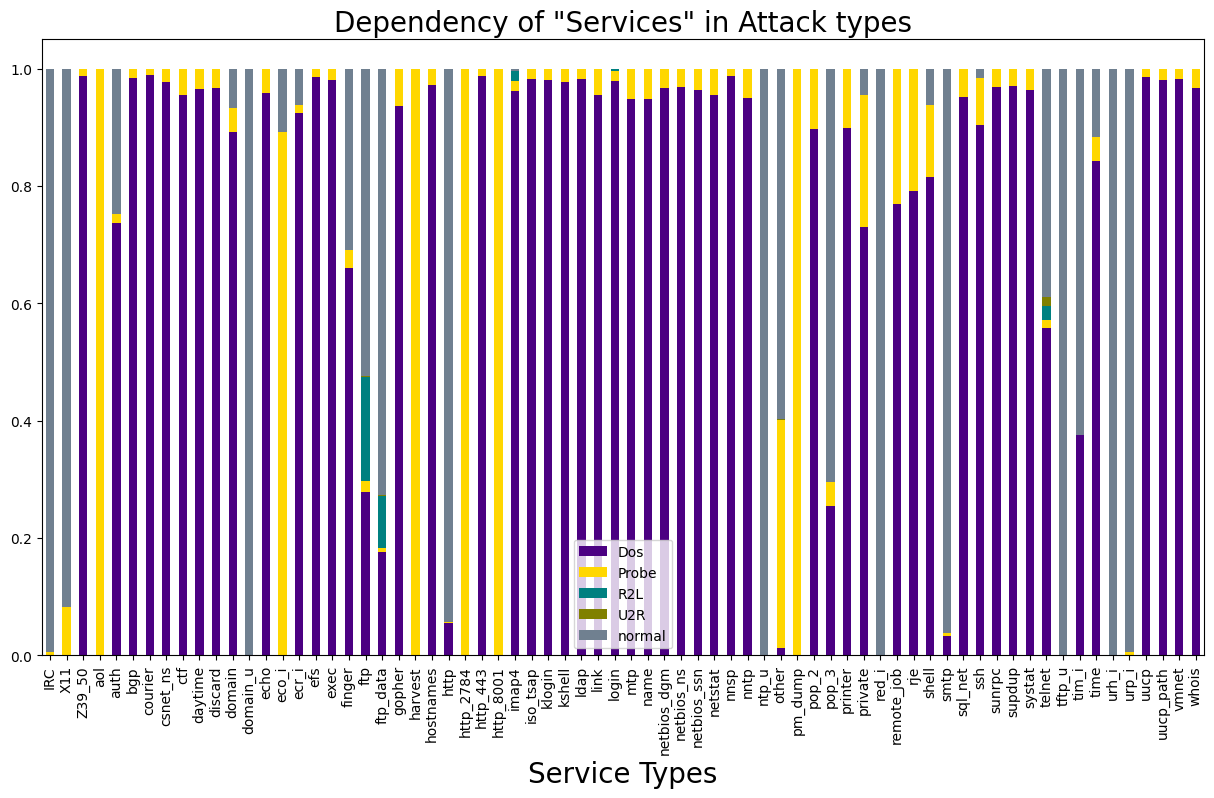

In [35]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['service'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])

plt.title('Dependency of "Services" in Attack types', fontsize = 20)
plt.xlabel('Service Types', fontsize = 20)
plt.legend()
plt.show()

    There are different types of Services noted in "service" variable. The above represented graph indicates most of the services impacting on Dos compared to Probe. Only few slightly impacting R2L and U2R.

#### Different difficulty level dependencies on Attack types

<Figure size 1000x800 with 0 Axes>

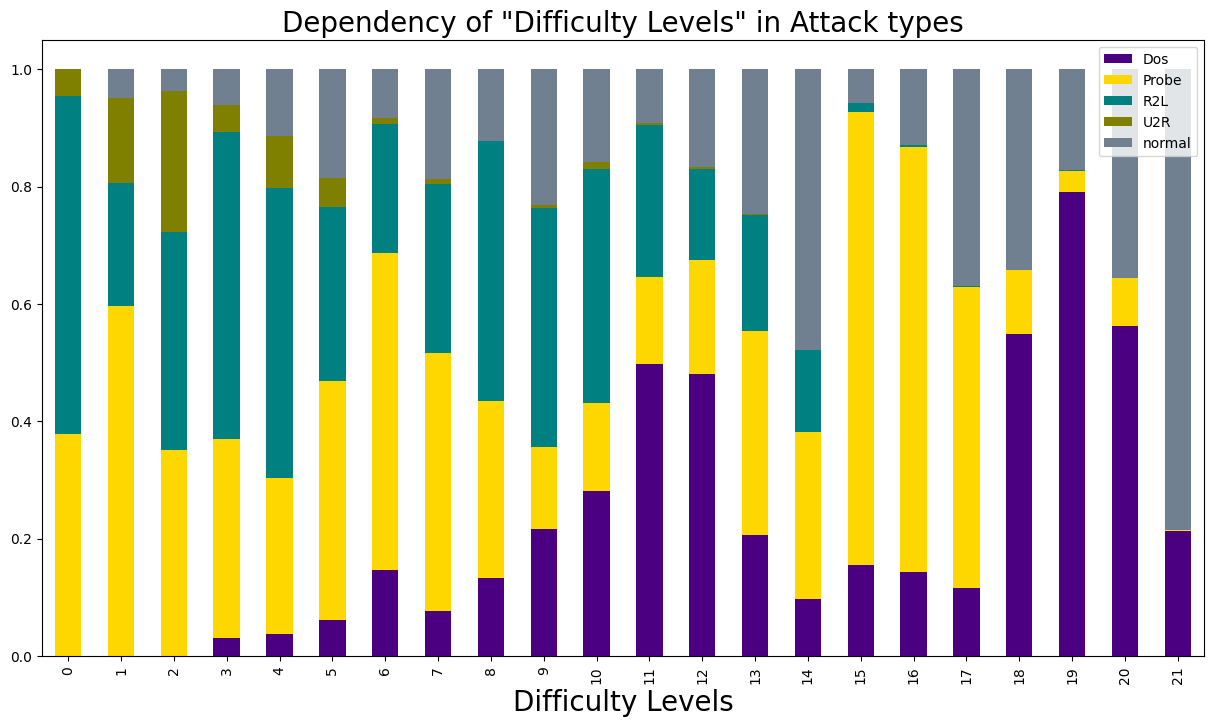

In [36]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(train_df['difficulty level'], train_df['attack_type'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'gold', 'teal', 'olive', "slategrey"])

plt.title('Dependency of "Difficulty Levels" in Attack types', fontsize = 20)
plt.xlabel('Difficulty Levels', fontsize = 20)
plt.legend()
plt.show()

    There are different types of difficulty levels noted in "difficulty level" variable. The above represented graph indicates that when difficulty level is increasing their impact is more on Dos and Probe compared to R2L and U2R. Probe & R2L attack types much found when difficulty levels are in starting points (0,1,2,3,4,5,6,7 and 8).

#### Sample train data

In [79]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos


#### Encoding attack_type to numerical for multi-label classification

##### function encoding to numerical value

In [80]:
def attack_encode(value):
    if value == 'normal':
        return 0;
    elif value == "Dos":
        return 1;
    elif value == 'Probe':
        return 2;
    elif value == 'R2L':
        return 3;
    else:
        return 4;

In [81]:
train_df['intrusion_code'] = train_df['attack_type'].apply(attack_encode)
train_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0.00,normal,20,normal,0
1,0.00,normal,15,normal,0
2,0.00,neptune,19,Dos,1
3,0.01,normal,21,normal,0
4,0.00,normal,21,normal,0
5,1.00,neptune,21,Dos,1
6,0.00,neptune,21,Dos,1
7,0.00,neptune,21,Dos,1
8,0.00,neptune,21,Dos,1
9,0.00,neptune,21,Dos,1


In [82]:
train_df[train_df['intrusion_code'] == 2].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
17,0.0,ipsweep,18,Probe,2
30,0.0,ipsweep,17,Probe,2
33,1.0,portsweep,20,Probe,2
56,0.0,nmap,17,Probe,2
62,1.0,satan,18,Probe,2


In [83]:
train_df[train_df['intrusion_code'] == 3].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
13,0.0,warezclient,15,R2L,3
48,0.0,warezclient,12,R2L,3
148,0.0,warezclient,11,R2L,3
190,0.0,warezclient,2,R2L,3
222,0.0,warezclient,12,R2L,3


In [84]:
train_df[train_df['intrusion_code'] == 4].iloc[:10, -5:].head()

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
3173,0.0,rootkit,1,U2R,4
5579,0.0,buffer_overflow,9,U2R,4
5831,0.0,buffer_overflow,12,U2R,4
8675,0.0,buffer_overflow,2,U2R,4
11448,0.0,rootkit,0,U2R,4


In [85]:
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [86]:
test_df['attack_type'] = test_df['class'].apply(encode_attack)
test_df.iloc[:20, -10:]

,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type
0,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
1,0.06,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos
2,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal
3,0.00,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L
4,0.17,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L
5,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal
6,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal
7,0.00,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L
8,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal
9,0.08,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L


In [87]:
test_df['intrusion_code'] = test_df['attack_type'].apply(attack_encode)
test_df.iloc[:10, -5:]

,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,1.00,neptune,21,Dos,1
1,1.00,neptune,21,Dos,1
2,0.00,normal,21,normal,0
3,0.00,saint,15,R2L,3
4,0.71,mscan,11,R2L,3
5,0.00,normal,21,normal,0
6,0.04,normal,21,normal,0
7,0.02,guess_passwd,15,R2L,3
8,0.00,normal,21,normal,0
9,0.00,guess_passwd,7,R2L,3


In [88]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,Dos,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal,0
5,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
6,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
7,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1
9,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21,Dos,1


In [89]:
test_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,difficulty level,attack_type,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21,Dos,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.00,0.00,0.00,normal,21,normal,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.00,0.00,0.00,saint,15,R2L,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.00,0.83,0.71,mscan,11,R2L,3
5,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.00,0.00,0.00,normal,21,normal,0
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,0.00,0.00,0.00,0.00,0.72,0.04,normal,21,normal,0
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,0.00,0.00,0.01,0.01,0.02,0.02,guess_passwd,15,R2L,3
8,0,tcp,http,SF,327,467,0,0,0,0,...,0.01,0.03,0.00,0.00,0.00,0.00,normal,21,normal,0
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,0.02,0.00,0.00,0.00,0.00,0.00,guess_passwd,7,R2L,3


#### Dropping class and attack_type variables as it was encoded in "intrusion_code"

In [90]:
train_df = train_df.drop(columns = ['class','difficulty level', 'attack_type'])
test_df = test_df.drop(columns = ['class', 'difficulty level','attack_type'])

In [91]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0


In [92]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,1
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,0
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,3


### Numerical Columns Correlations with respect to target column

In [93]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
num_failed_logins              0.023120
src_bytes                      0.012981
srv_diff_host_rate             0.010456
dst_bytes                      0.008651
root_shell                     0.007758
num_shells                     0.005208


In [38]:
# Select only categorical variables
category_df = train_df.select_dtypes('object')

# One hot encode the variables
dummy_df = pd.get_dummies(category_df)

# Put the label column back in the dataframe
dummy_df['intrusion_code'] = train_df['intrusion_code']

dummy_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,intrusion_code
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [94]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['intrusion_code'].sort_values(ascending=False)

intrusion_code        1.000000
service_private       0.398863
flag_S0               0.373549
service_eco_i         0.338355
protocol_type_icmp    0.292874
                        ...   
protocol_type_udp    -0.155004
service_smtp         -0.189656
service_domain_u     -0.229571
service_http         -0.511499
flag_SF              -0.548643
Name: intrusion_code, Length: 85, dtype: float64

#### Feature selection by dropping redudant feature:

    a) redundant features will be dropped where it has no impact on target variable

    b) Highly correlated features will be involved in modeling for classification purposes


#### Dropping reducant features from train and test DataFrames

In [95]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'intrusion_code'],
      dtype='object')

In [96]:
train_df = train_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'])

test_df = test_df.drop(columns=['num_outbound_cmds', 'srv_count', 'dst_bytes', 'src_bytes', 
                                  'land', 'is_host_login', 'urgent', 'num_failed_logins', 'num_shells'
                                 ])

In [97]:
train_df.tail(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
125963,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0
125964,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125965,0,tcp,smtp,SF,0,0,1,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,0
125966,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,1
125967,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,0
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
125969,8,udp,private,SF,0,0,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,0
125970,0,tcp,smtp,SF,0,0,1,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,0
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,1
125972,0,tcp,ftp_data,SF,0,0,1,0,0,0,...,77,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,0


In [98]:
test_df.head(10)

,duration,protocol_type,service,flag,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_code
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
2,2,tcp,ftp_data,SF,0,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,0
3,0,icmp,eco_i,SF,0,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,3
4,1,tcp,telnet,RSTO,0,0,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,3
5,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,0
6,0,tcp,smtp,SF,0,0,1,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,0
7,0,tcp,telnet,SF,0,0,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,3
8,0,tcp,http,SF,0,0,1,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0
9,0,tcp,ftp,SF,0,0,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,3


In [99]:
train_df.corr()['intrusion_code'].sort_values(ascending = False)

intrusion_code                 1.000000
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
diff_srv_rate                  0.282314
dst_host_srv_diff_host_rate    0.239646
dst_host_count                 0.196102
duration                       0.129443
hot                            0.065085
wrong_fragment                 0.054795
is_guest_login                 0.030600
srv_diff_host_rate             0.010456
root_shell                     0.007758
num_compromised               -0.009003
num_root                      -0.010020
num_file_creations            -0.014384
su_attempted                  -0.019483


#### One-hot encoding for train and test datasets

In [100]:
train_df_new = pd.get_dummies(train_df)
test_df_new = pd.get_dummies(test_df)

In [101]:
print (train_df_new.shape)
print (test_df_new.shape)

(125973, 114)
(22544, 108)


In [102]:
set(train_df_new.columns).difference(set(test_df_new))

{'service_aol',
 'service_harvest',
 'service_http_2784',
 'service_http_8001',
 'service_red_i',
 'service_urh_i'}

In [103]:
train_df_new

,duration,wrong_fragment,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_access_files,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
125969,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125970,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
125971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### Selecting top 30 highly correlated features with respect to target variable : intrusion_code

In [104]:
highly_correlated = train_df_new.corr().abs()['intrusion_code'].sort_values(ascending=False)
highly_correlated[:30]

intrusion_code                 1.000000
dst_host_srv_count             0.624241
logged_in                      0.576031
flag_SF                        0.548643
dst_host_same_srv_rate         0.525829
service_http                   0.511499
same_srv_rate                  0.510871
service_private                0.398863
dst_host_diff_srv_rate         0.391328
count                          0.388358
dst_host_srv_serror_rate       0.384796
dst_host_serror_rate           0.382118
serror_rate                    0.381646
srv_serror_rate                0.378669
flag_S0                        0.373549
service_eco_i                  0.338355
dst_host_same_src_port_rate    0.319096
dst_host_srv_rerror_rate       0.310227
srv_rerror_rate                0.309909
rerror_rate                    0.308668
dst_host_rerror_rate           0.293805
protocol_type_icmp             0.292874
diff_srv_rate                  0.282314
flag_RSTR                      0.255984
dst_host_srv_diff_host_rate    0.239646


##### Selecting only top 30 feature set from train and test datasets for modeling

In [105]:
list(highly_correlated[:30].index)

['intrusion_code',
 'dst_host_srv_count',
 'logged_in',
 'flag_SF',
 'dst_host_same_srv_rate',
 'service_http',
 'same_srv_rate',
 'service_private',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'flag_S0',
 'service_eco_i',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'diff_srv_rate',
 'flag_RSTR',
 'dst_host_srv_diff_host_rate',
 'service_domain_u',
 'flag_REJ',
 'dst_host_count',
 'service_smtp',
 'protocol_type_udp']

In [106]:
train_df_new = train_df_new[list(highly_correlated[:30].index)]
test_df_new = train_df_new[list(highly_correlated[:30].index)]

#### Generate HeatMap visualization on newly made correlated dateset

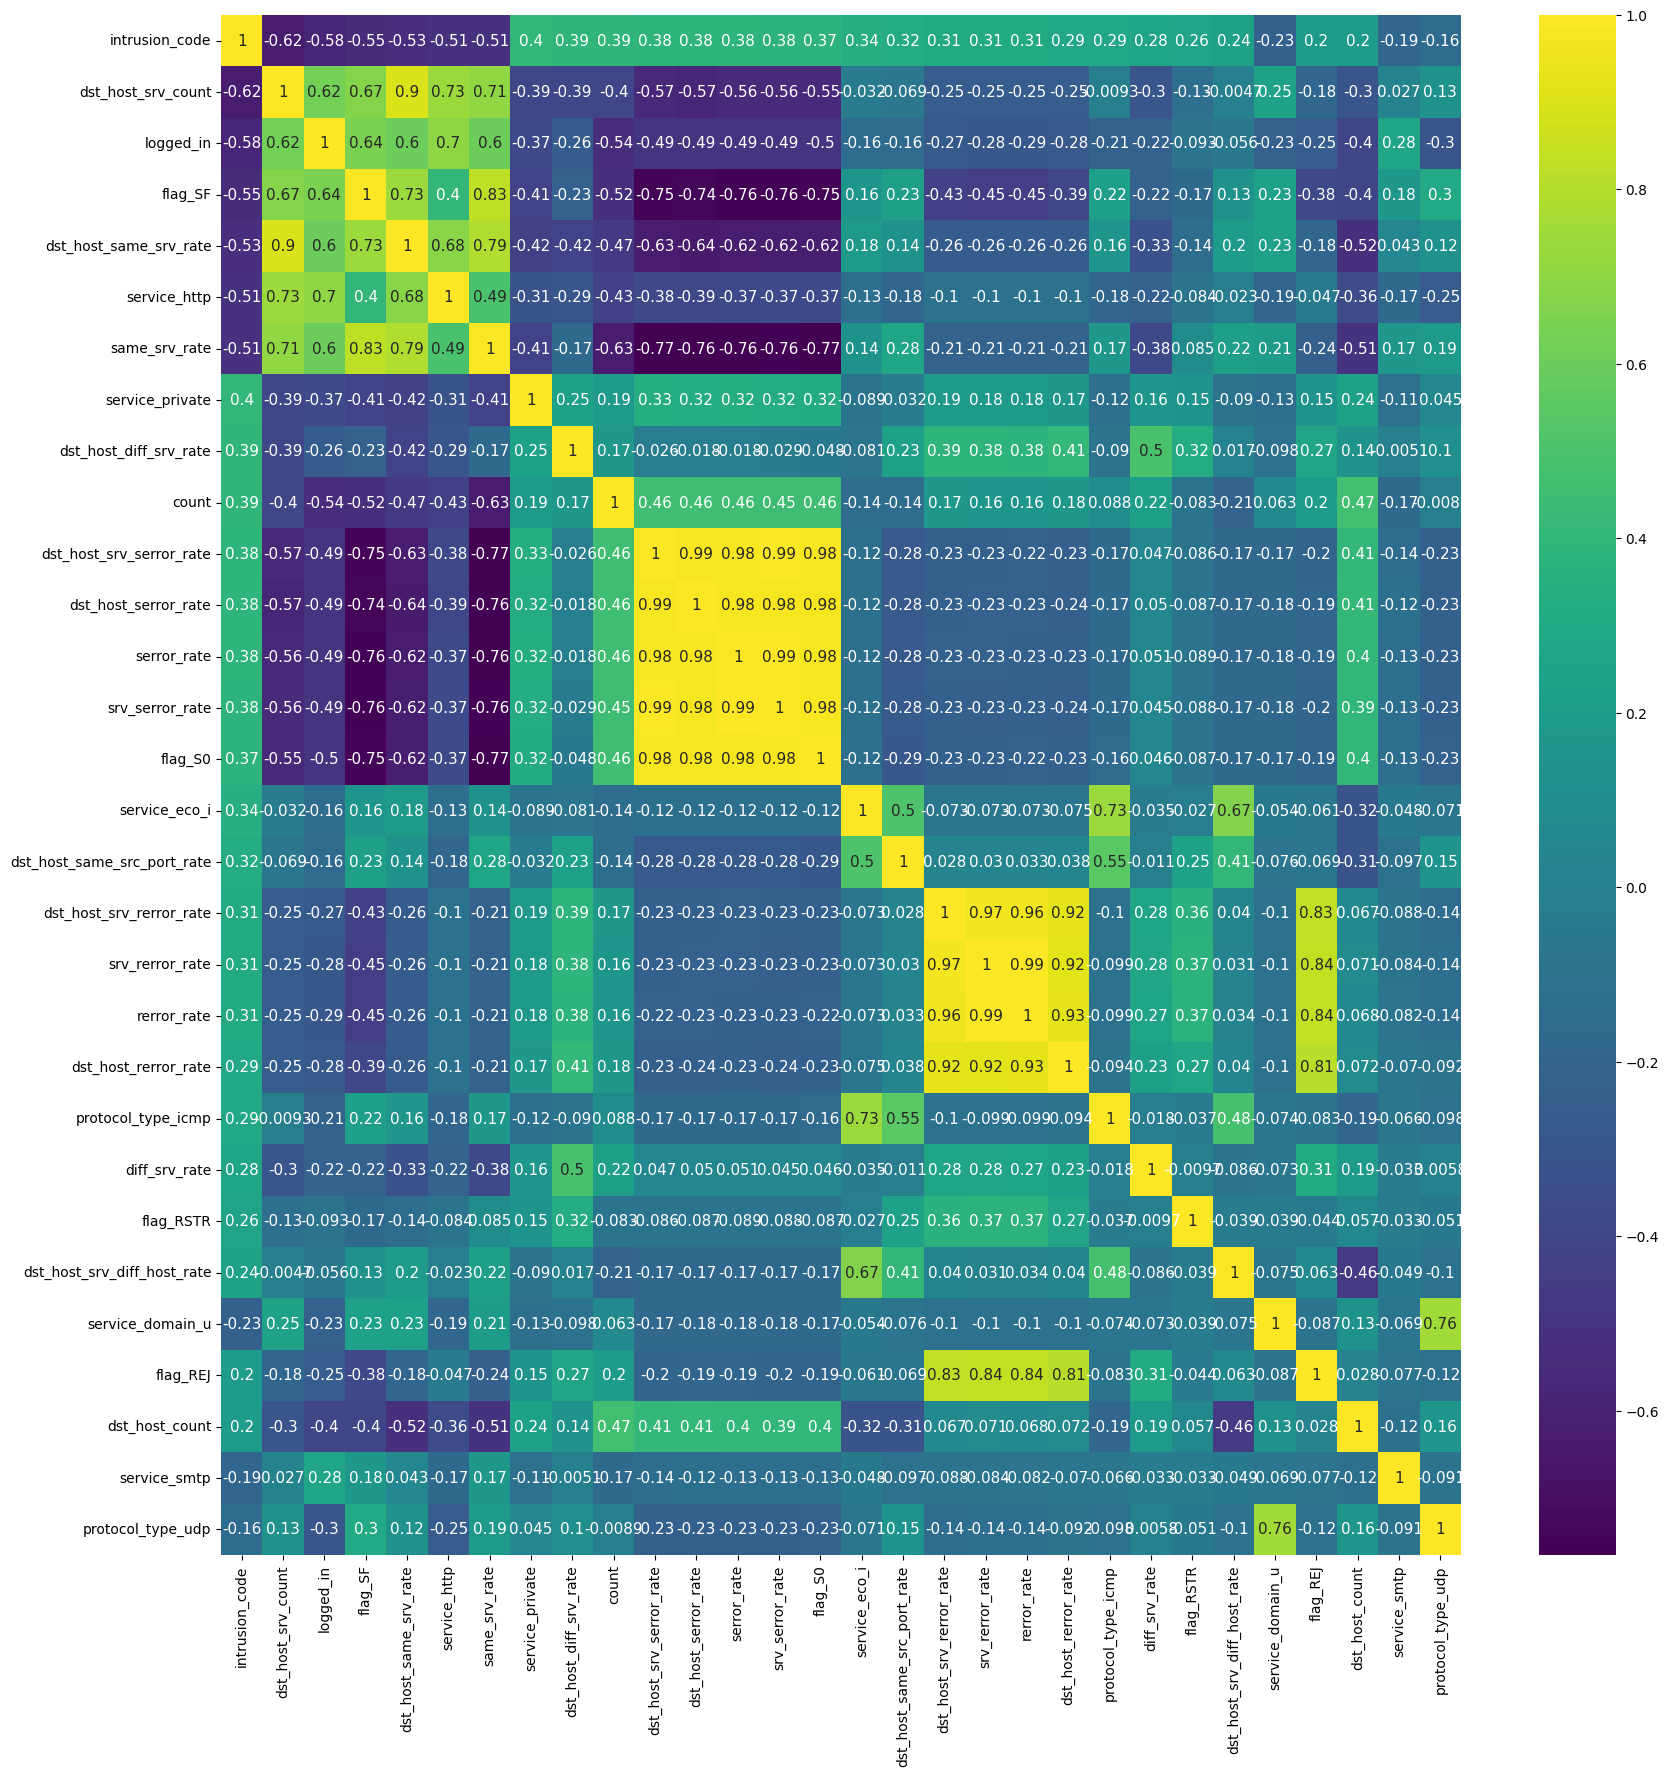

In [107]:
corr_df = train_df_new.corr()[train_df_new.corr().index]
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, cmap='viridis', annot=True, annot_kws={"size": 11})
plt.show()

In [108]:
train_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


In [109]:
test_df_new.head(10)

,intrusion_code,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,...,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp
0,0,25,0,1,0.17,0,1.00,0,0.03,2,...,0.05,0,0.00,0,0.00,0,0,150,0,0
1,0,1,0,1,0.00,0,0.08,0,0.60,13,...,0.00,0,0.15,0,0.00,0,0,255,0,1
2,1,26,0,0,0.10,0,0.05,1,0.05,123,...,0.00,0,0.07,0,0.00,0,0,255,0,0
3,0,255,1,1,1.00,1,1.00,0,0.00,5,...,0.00,0,0.00,0,0.04,0,0,30,0,0
4,0,255,1,1,1.00,1,1.00,0,0.00,30,...,0.00,0,0.00,0,0.00,0,0,255,0,0
5,1,19,0,0,0.07,0,0.16,1,0.07,121,...,1.00,0,0.06,0,0.00,0,1,255,0,0
6,1,9,0,0,0.04,0,0.05,1,0.05,166,...,0.00,0,0.06,0,0.00,0,0,255,0,0
7,1,15,0,0,0.06,0,0.14,1,0.07,117,...,0.00,0,0.06,0,0.00,0,0,255,0,0
8,1,23,0,0,0.09,0,0.09,0,0.05,270,...,0.00,0,0.05,0,0.00,0,0,255,0,0
9,1,13,0,0,0.05,0,0.06,1,0.06,133,...,0.00,0,0.06,0,0.00,0,0,255,0,0


In [110]:
train_df_new.shape

(125973, 30)

In [111]:
test_df_new.shape

(125973, 30)

## 4. Modeling

### Preparing X (feature set variables) and y(target variable)

In [112]:
X = train_df_new.drop(columns = "intrusion_code")
y = train_df_new["intrusion_code"]

In [113]:
X.shape

(125973, 29)

#### Standardizing data using StandardScaler

In [114]:
X.columns = X.columns.astype(str)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

#### Splitting data into train and test

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=13)

#### Evaluating model using testing data

In [114]:
metrics.classification_report(y_test,predictions)
metrics.plot_confusion_matrix(dtree, X_test, y_test)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

### (i) Linear Regression

In [116]:
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
et=ExtraTreesClassifier()
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [127]:
from sklearn.metrics import accuracy_score
pred = et.predict(X_test)
print(classification_report(y_test,pred))
print(accuracy_score(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33700
           1       1.00      1.00      1.00     22873
           2       1.00      0.99      0.99      5896
           3       0.93      0.89      0.91       490
           4       0.24      0.14      0.18        28

    accuracy                           1.00     62987
   macro avg       0.83      0.80      0.81     62987
weighted avg       1.00      1.00      1.00     62987

0.9956816485941543


In [167]:
metrics.plot_confusion_matrix(lr, X_test, y_test)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

    Logistic regression model has not classified data well compared to Decision Tree and KNN. Lots of misclassification data has observed in labels. So this model is not classifying this data well.

## 4. Model Evaluation
    Now we run our model against some data that it has not seen before ie. test_df. We can think of this data as new network traffic.

In [214]:
X_t = test_df_new.drop(columns = 'intrusion_code')
y_t = test_df_new['intrusion_code']

In [215]:
X_t.shape

(125973, 29)

In [216]:
y_t.shape

(125973,)

In [217]:
X_t.columns = X_t.columns.astype(str)
scaler = StandardScaler().fit(X_t)
X_t = scaler.transform(X_t)

In [218]:
train_df_new.shape

(125973, 30)

#### LinearRegression Predictions and Classification report on new testing data

In [219]:
pred = et.predict(X_t)
print(classification_report(y_t,pred))
print(accuracy_score(pred,y_t))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67343
           1       1.00      1.00      1.00     45927
           2       1.00      1.00      1.00     11656
           3       0.97      0.93      0.95       995
           4       0.57      0.33      0.41        52

    accuracy                           1.00    125973
   macro avg       0.91      0.85      0.87    125973
weighted avg       1.00      1.00      1.00    125973

0.9974280202900622


In [174]:
conf_mat=confusion_matrix(y_t,pred)
print(conf_mat)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))

[[67233    40    31    30     9]
 [   55 45865     7     0     0]
 [   36     8 11612     0     0]
 [   72     0     0   921     2]
 [   35     0     0     1    16]]
Accuracy of prediction: 0.894


In [143]:
metrics.plot_confusion_matrix(lr, X_t, y_t)

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

    Logisitic Regression has not performed well on unseen data compared to Decision Tree

## 5. Conclusion

    It was a great exploration and learning in path and dive of this data analysis. Critically examining things of each variable and understanding through insightful visualizations is the key factor of any data analysis. Initial process of this data analysis went through EDA (Exploratory Data Analysis) which includes pre-processing the data and creating meaningful visualizations to understand data better. Later, the data was prepared using hot-encoding for class variables to categorize data into 5 groups as Normal, Dos, Probe, R2L and U2R. Which was later helpful to understand any future instance in machine learning modeling process. Modeling has done using following ways.
    
    1. Initially train_df was split into train and test data using train_test_split method from sklearn. This is helpful to train and test the data before we encounter with unseen data.
    2. Trained 3 algorithms. 1. Decision Tree 2. KNN 3. Logistic Regression
    3. All three algorithms have been evaluated on testing data which was initially split from train_df
    4. Later apart, All algorithms have been evaluated with new and unseen data which is test_df
    5. Finalized data results using confusion matrix plot.
    
    Decision Tree algorithm has performed reliably on new and unseen data for classifying labels (0, 1, 2, 3 and 4). Which his more preferred to be used for future instances.
    
    Also, in terms of execution performance, KNN took execution time longer than Decision Tree and Logistic Regression. Although it has not performed well.